In [1]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [3]:
iris = datasets.load_iris()

iris_data = pd.DataFrame(data = iris.data[:,0:2], columns = ["Sepal Length (cm)", "Sepal Width (cm)"])
iris_target = pd.DataFrame(data = (iris.target != 0) * 1, columns = ["Target"])
iris_df = pd.concat([iris_data, iris_target], axis = 1)

In [4]:
#training and testing set size
train_size=int(0.75*iris_df.shape[0])
test_size=int(0.25*iris_df.shape[0])

print("Training set size : "+ str(train_size))
print("Testing set size : "+str(test_size))

#Getting features from dataset
Data=iris_df.sample(frac=1)
X=Data.iloc[:,[0, 1]].values
y=Data.iloc[:,2].values

#add intercept
X = add_intercept(X)
#training set split
X_train=X[0:train_size,:]
y_train=y[0:train_size]

#testing set split
X_test=X[train_size:,:]
y_test=y[train_size:]

Training set size : 112
Testing set size : 37


In [5]:
class LogisticRegression_l2:
    
    def __init__(self, _lambda=0.001, lr=0.01, num_iter=10000, w0=0.5, verbose=True):
        self.lr = lr
        self.num_iter = num_iter
        self.verbose = verbose
        self._lambda = _lambda
        self.w0 = w0
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def prediction(self, w, Data):
        pred = []
        z = np.dot(Data,w)
        a = self.sigmoid(z)
        
        for i in range(0,len(a)):
            if (a[i] > self.w0): 
                pred.append(1)
            elif (a[i] <= self.w0):
                pred.append(0)
        return pred

    def cost(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean() + self._lambda/(2 * y.shape[0]) * sum(self.theta ** 2)

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = (1/y.shape[0]) * (np.dot(X.T, (h - y)) + self._lambda * self.theta)
            self.theta -= self.lr * gradient
            
            if (self.verbose) and (i % 100) == 0:
                loss = self.cost(h, y)
                y_pred = self.prediction(self.theta, X)
                print('loss =',round(loss,3),' Training Accuracy',round(accuracy_score(y, y_pred)*100,1))
                
    def get_theha(self):
        return self.theta

In [6]:
logreg = LogisticRegression_l2()
logreg.fit(X_train,y_train)

loss = 0.693  Training Accuracy 67.0
loss = 0.564  Training Accuracy 67.0
loss = 0.521  Training Accuracy 67.0
loss = 0.484  Training Accuracy 67.0
loss = 0.451  Training Accuracy 71.4
loss = 0.423  Training Accuracy 76.8
loss = 0.398  Training Accuracy 84.8
loss = 0.376  Training Accuracy 88.4
loss = 0.356  Training Accuracy 90.2
loss = 0.339  Training Accuracy 92.0
loss = 0.323  Training Accuracy 94.6
loss = 0.309  Training Accuracy 96.4
loss = 0.297  Training Accuracy 97.3
loss = 0.285  Training Accuracy 97.3
loss = 0.275  Training Accuracy 97.3
loss = 0.265  Training Accuracy 98.2
loss = 0.256  Training Accuracy 98.2
loss = 0.248  Training Accuracy 98.2
loss = 0.24  Training Accuracy 98.2
loss = 0.233  Training Accuracy 98.2
loss = 0.227  Training Accuracy 98.2
loss = 0.221  Training Accuracy 98.2
loss = 0.215  Training Accuracy 99.1
loss = 0.21  Training Accuracy 99.1
loss = 0.205  Training Accuracy 99.1
loss = 0.2  Training Accuracy 99.1
loss = 0.196  Training Accuracy 99.1
loss 

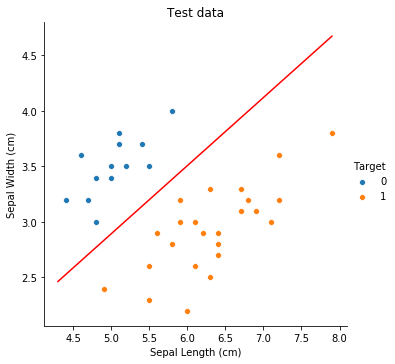

Test accuracy = 1.0


In [7]:
w = logreg.get_theha()

sns.pairplot(x_vars=["Sepal Length (cm)"], y_vars=["Sepal Width (cm)"], data=Data.iloc[train_size:,:],
                                                                                        hue="Target", height=5)
domain =  np.linspace(iris_df['Sepal Length (cm)'].min(),iris_df['Sepal Length (cm)'].max(),2)
h_x = -(w[1]/w[2])*domain - (w[0]/w[2])
plt.plot(domain,h_x,color='red')
plt.title('Test data')
plt.show()
print('Test accuracy =', accuracy_score(logreg.prediction(logreg.get_theha(),X_test),y_test))